Setup  using miniconda but you can use any setup that works for you:

Install conda https://docs.anaconda.com/free/miniconda/miniconda-install/:

`mkdir -p ~/miniconda3`

`curl https://repo.anaconda.com/miniconda/Miniconda3-latest-MacOSX-arm64.sh -o ~/miniconda3/miniconda.sh`

`bash ~/miniconda3/miniconda.sh -b -u -p ~/miniconda3`

`rm -rf ~/miniconda3/miniconda.sh`

`~/miniconda3/bin/conda init zsh`

`source .zshrc`

Cheatsheet for conda: https://docs.conda.io/projects/conda/en/4.6.0/_downloads/52a95608c49671267e40c689e0bc00ca/conda-cheatsheet.pdf

Now conda is installed, we are going to use it and install other required packages:

`conda activate`

`conda create --name pulp python=3.12 `

`conda activate pulp #conda deactivate`

`conda install jupyter coin-or-clp`

`pip install pulp matplotlib`

`jupyter notebook`

Further reading for COIN-OR: https://coin-or.github.io/pulp/

Play around with different values of dualT, primalT, preT. From the coin-or help:

clp


Clp:dualT??

dualT(olerance) : For an optimal solution no dual infeasibility may exceed this value
Normally the default tolerance is fine, but one may want to increase
it a bit if the dual simplex algorithm seems to be having a hard time.
One method which can be faster is to use a large tolerance e.g. 1.0e-4
and the dual simplex algorithm and then to clean up the problem using
the primal simplex algorithm with the correct tolerance (remembering
to switch off presolve for this final short clean up phase).
<Range of values is 1e-20 to 1.79769e+308;


Clp:primalT??

primalT(olerance) : For a feasible solution no primal infeasibility, i.e., constraint violation, may exceed this value
Normally the default tolerance is fine, but one may want to increase
it a bit if the primal simplex algorithm seems to be having a hard time.
<Range of values is 1e-20 to 1.79769e+308;


Clp:preT??

preT(olerance) : Tolerance to use in presolve
One may want to increase this tolerance if presolve says the problem
is infeasible and one has awkward numbers and is sure that the problem is really feasible.
<Range of values is 1e-20 to 1.79769e+308;

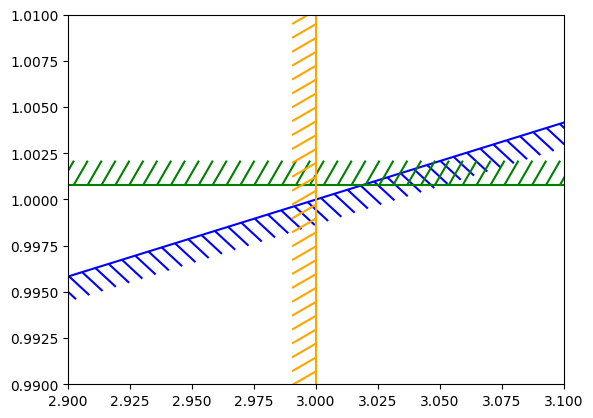

In [1]:
# https://people.mines.edu/anewman/wp-content/uploads/sites/158/2019/11/27-LP_practice123112.pdf example on page 24
# First lets visualize the optimization problem:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import patheffects

fig1 = plt.figure()
ax = fig1.add_subplot( )

nx1 = 100
nx2 = 100

x1vec = np.linspace(-10.0, 5.0, nx1)
x2vec = np.linspace(-10.0, 5.0, nx2)

x1, x2 = np.meshgrid(x1vec, x2vec)

# Evaluate the optimization problem to plot, there is no objective function for this example hence only plotting the feasible space
g1 = -x1 + 24*x2 - 21
g2 = x2 - 1.0008 #Note the deviation from the paper for easier visualisation
g3 = x1 - 3

# Plot it
cg1 = ax.contour(x1, x2, g1, [0], colors='blue')
cg1.set(path_effects=[patheffects.withTickedStroke(angle=-60, length=2)])

cg2 = ax.contour(x1, x2, g2, [0], colors='green')
cg2.set(path_effects=[patheffects.withTickedStroke(angle=60, length=2)])

cg3 = ax.contour(x1, x2, g3, [0], colors='orange')
cg3.set(path_effects=[patheffects.withTickedStroke(angle=-60, length=2)])

ax.set_xlim(2.9, 3.1)
ax.set_ylim(0.99, 1.01)

plt.show()

In [2]:
# Import PuLP modeler functions
from pulp import *

# A new LP problem
prob = LpProblem("test1", LpMinimize)

# Variables
# x1 <= 3
x1 = LpVariable("x1", lowBound=None, upBound=3)
# 1.0008 <= x2
x2 = LpVariable("x2", lowBound=1.0008) #Note the deviation from the paper, as above for easier visualisation, try to change this to different values
# Use None for +/- Infinity, i.e. z <= 0 -> LpVariable("z", None, 0)

# Objective
prob += 1, "obj" #the example has no objective function so just use any constant
# (the name at the end is facultative)

# Constraints
prob += -x1 + 24*x2 <= 21, "c1"
# (the names at the end are facultative)

constr = prob.constraints
print(constr)

# Write the problem as an LP file or as JSON file
# prob.writeLP("test1.lp")
# prob.toJson("test1.json")

# Solver tolerance, also try different tolerances for preT, dualT, primalT

tolerance = '0.1'
pretolerance = tolerance

# tolerance = '0.0001'
# pretolerance = tolerance


prob.solve(PULP_CBC_CMD(options=['dualT ' + tolerance, 'primalT ' + tolerance, 'preT ' + tolerance ]))

# Print the status of the solved LP
print("Status:", LpStatus[prob.status])

# Print the value of the variables at the optimum
for v in prob.variables():
    print(v.name, "=", v.varValue)

# Print the value of the objective
print("objective=", value(prob.objective))

OrderedDict({'c1': -1*x1 + 24*x2 + -21 <= 0})
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/miniconda3/envs/pulp/lib/python3.12/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/hh/d7y3jjl11pl3wrhvqt_9cljh0000gp/T/c369af564bea480fb4cb09d69a10b990-pulp.mps -dualT 0.1 -primalT 0.1 -preT 0.1 -timeMode elapsed -branch -printingOptions all -solution /var/folders/hh/d7y3jjl11pl3wrhvqt_9cljh0000gp/T/c369af564bea480fb4cb09d69a10b990-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 6 COLUMNS
At line 10 RHS
At line 12 BOUNDS
At line 17 ENDATA
Problem MODEL has 1 rows, 3 columns and 2 elements
Coin0008I MODEL read with 0 errors
dualTolerance was changed from 1e-07 to 0.1
primalTolerance was changed from 1e-07 to 0.1
preTolerance was changed from 1e-08 to 0.1
Option for timeMode changed from cpu to elapsed
Presolve 0 (-1) rows, 0 (-3) columns and 0 (-2) elements
Empty problem - 0 rows, 0 columns and 0 element

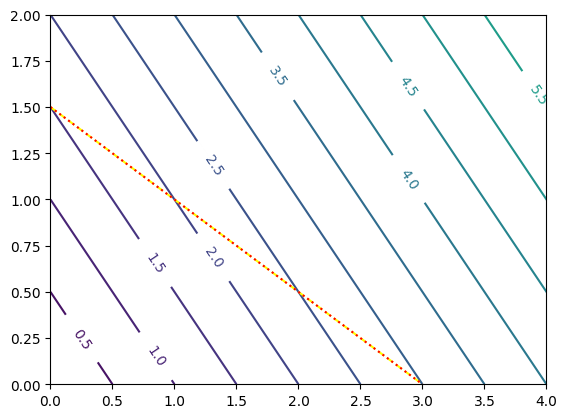

In [3]:
# https://people.mines.edu/anewman/wp-content/uploads/sites/158/2019/11/27-LP_practice123112.pdf example on page 23
# First lets visualize the optimization problem:

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import patheffects

fig1 = plt.figure()
ax = fig1.add_subplot( )

nx1 = 100
nx2 = 100

# Set up vectors
x1vec = np.linspace(0.0, 5.0, nx1)
x2vec = np.linspace(0.0, 5.0, nx2)

# Set up matrices. 
x1, x2 = np.meshgrid(x1vec, x2vec)

# Evaluate the optimization problem to plot
obj = x1 + x2
g1 = 1/3*x1 + 2/3*x2 - 1
g2 = x1 + 2*x2 - 3

cntr = ax.contour(x1, x2, obj, 20,
                   #colors='black')
                  cmap='viridis')
ax.clabel(cntr, fmt="%2.1f", use_clabeltext=True)

cg1 = ax.contour(x1, x2, 100*g1, [0], colors='yellow')
cg1.set(linestyles='dashed')

cg2 = ax.contour(x1, x2, 100*g2, [0], colors='red')
cg2.set(linestyles='dotted')

ax.set_xlim(0, 4)
ax.set_ylim(0, 2)

plt.show()

In [4]:
# Import PuLP modeler functions
from pulp import *

# A new LP problem
prob = LpProblem("test1", LpMaximize)

# Variables
# 0 <= x1
x1 = LpVariable("x1", lowBound=0)
# 0 <= x2
x2 = LpVariable("x2", lowBound=0)
# Use None for +/- Infinity, i.e. z <= 0 -> LpVariable("z", None, 0)

# Objective
prob += x1 + x2, "obj"
# (the name at the end is facultative)

# Solver tolerance, also try different tolerances for preT, dualT, primalT
# Use rounding_precision to simulate difference precisions

tolerance = '0.1'
pretolerance = '0.1'
rounding_precision = 5

#tolerance = '0.001'
#pretolerance = '0.001'
#rounding_precision = 5

#tolerance = '1e-7'
#pretolerance = '1e-7'
#rounding_precision = 5

#tolerance = '1e-7'
#pretolerance = '1e-7'
#rounding_precision = 5


#tolerance = '0.1'
#pretolerance = '0.1'

#tolerance = '1e-7'
#pretolerance = '1e-7'


# Constraints
# Play around with different precision for the fractions and tolerance:
#prob += 1/3*x1 + 2/3*x2 == 1, "c1"
prob += round(1/3,rounding_precision)*x1 + round(2/3,rounding_precision)*x2 == 1, "c1"
#prob += np.float16(1/3)*x1 + np.float16(2/3)*x2 == 1, "c1" #infeasible with tolerarance 1e-7
prob += 1*x1 + 2*x2 == 3, "c2"
# (the names at the end are facultative)

constr = prob.constraints
print(constr)

# Write the problem as an LP file or to JSON
# prob.writeLP("test1.lp")
# prob.toJson("test1.json")

prob.solve(PULP_CBC_CMD(options=['dualT ' + tolerance, 'primalT ' + tolerance, 'preT ' + pretolerance]))#, 'scal equilibrium', 'presolve on', 'max']))

# Print the status of the solved LP
print("Status:", LpStatus[prob.status])

# Print the value of the variables at the optimum
for v in prob.variables():
    print(v.name, "=", v.varValue)

# Print the value of the objective
print("objective=", value(prob.objective))

OrderedDict({'c1': 0.33333*x1 + 0.66667*x2 + -1.0 = 0, 'c2': 1*x1 + 2*x2 + -3 = 0})
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/miniconda3/envs/pulp/lib/python3.12/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/hh/d7y3jjl11pl3wrhvqt_9cljh0000gp/T/17719ccca0d8498cb5575ee5393fc3cd-pulp.mps -max -dualT 0.1 -primalT 0.1 -preT 0.1 -timeMode elapsed -branch -printingOptions all -solution /var/folders/hh/d7y3jjl11pl3wrhvqt_9cljh0000gp/T/17719ccca0d8498cb5575ee5393fc3cd-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
dualTolerance was changed from 1e-07 to 0.1
primalTolerance was changed from 1e-07 to 0.1
preTolerance was changed from 1e-08 to 0.1
Option for timeMode changed from cpu to elapsed
Presolve 0 (-2) rows, 0 (-2) columns and 0 (-4) elements
Empt